In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
from scipy.signal import find_peaks
import numpy as np
from scipy.interpolate import interp1d
from scipy.stats import linregress

def f(X, A, B):
    '''
    Y = AX + B
    '''
    return A * X + B

def f_1(Y, A, B):
    '''
    Y = AX + B
    '''
    return (Y - B) / A

def get_value(x_array, y_array, x_value):
    # Create an interpolator
    f = interp1d(x_array, y_array)
    # Interpolate the value
    y_value = f(x_value)
    return y_value

In [2]:
df = pd.read_csv('all.csv', encoding='latin-1', nrows=481, skiprows=[1])
del df['Unnamed: 20']

In [3]:
order = [3, 5, 9, 1, 2, 4, 6, 7, 8, 10]
V_bts = np.array([8.0, 6.0, 4.0, 2.0, 4.0, 2.0, 1.0, 0.5, 4.0, 4.0])
M = 624.39 
c_bts = 0.2 / M
c = c_bts * V_bts / 50

col_names = []
for i in order:
    col_names.append(f'{i}-wl')
    col_names.append(f'{i}-a')
df.columns = col_names
df

,3-wl,3-a,5-wl,5-a,9-wl,9-a,1-wl,1-a,2-wl,2-a,4-wl,4-a,6-wl,6-a,7-wl,7-a,8-wl,8-a,10-wl,10-a
0,700.041382,-0.000255,700.041382,0.023769,700.041382,0.009038,700.041382,0.001352,700.041382,0.000873,700.041382,0.000262,700.041382,0.010937,700.041382,0.004113,700.014343,0.003613,700.014343,0.019291
1,699.033203,-0.000796,699.033203,0.025051,699.033203,0.009596,699.033203,0.000902,699.033203,0.000624,699.033203,-0.000148,699.033203,0.011183,699.033203,0.003916,699.005981,0.003873,699.005981,0.020074
2,698.024658,-0.000521,698.024658,0.027058,698.024658,0.010281,698.024658,0.001246,698.024658,0.000548,698.024658,-0.000104,698.024658,0.012322,698.024658,0.004734,697.997253,0.003884,697.997253,0.020911
3,697.015808,-0.000527,697.015808,0.029462,697.015808,0.011077,697.015808,0.001157,697.015808,0.000910,697.015808,0.000130,697.015808,0.013594,697.015808,0.004945,696.988220,0.004064,696.988220,0.022193
4,696.006653,-0.000431,696.006653,0.031303,696.006653,0.011774,696.006653,0.001393,696.006653,0.000689,696.006653,0.000029,696.006653,0.014522,696.006653,0.005600,695.978821,0.004615,695.978821,0.023826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,224.062561,0.710753,224.062561,0.785260,224.062561,0.734588,224.062561,1.495316,224.062561,1.090969,224.062561,0.354671,224.062561,0.413075,224.062561,0.178821,223.949875,0.265603,223.949875,0.778979
477,222.962875,0.761356,222.962875,0.842922,222.962875,0.779937,222.962875,1.587933,222.962875,1.154618,222.962875,0.377581,222.962875,0.443401,222.962875,0.195153,223.007141,0.285445,223.007141,0.823807
478,222.020203,0.807443,222.020203,0.898849,222.020203,0.829994,222.020203,1.676133,222.020203,1.230355,222.020203,0.401210,222.020203,0.479898,222.020203,0.213957,222.064316,0.307866,222.064316,0.869601
479,221.077438,0.846156,221.077438,0.949397,221.077438,0.867596,221.077438,1.774636,221.077438,1.296340,221.077438,0.422396,221.077438,0.510813,221.077438,0.233549,220.964279,0.341623,220.964279,0.924401


(0.0, 1.0)

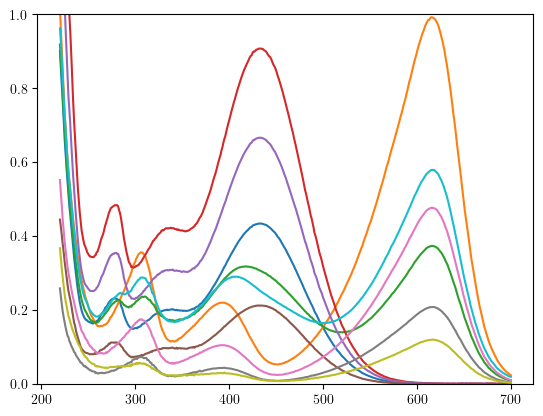

In [4]:
#interpolated = [[], []]
interpolated = []
for i in order:
    interpolated.append(interp1d(df[f'{i}-wl'], df[f'{i}-a']))
    #interpolated[1].append(i)
for i in order:
    plt.plot(df[f'{i}-wl'], interpolated[order.index(i)](df[f'{i}-wl']))
plt.ylim(0, 1)

In [5]:
acidic = [1, 2, 3, 4]
#pH = 
basic = [5, 6, 7, 8]
buffer = [9, 10]
ml4 = [3, 5, 9, 10]
names = ['Acidic', 'Basic', f'Buffer $pH=6.86$', f'Buffer $pH=7.3$']

Text(0, 0.5, 'A, $a.u.$')

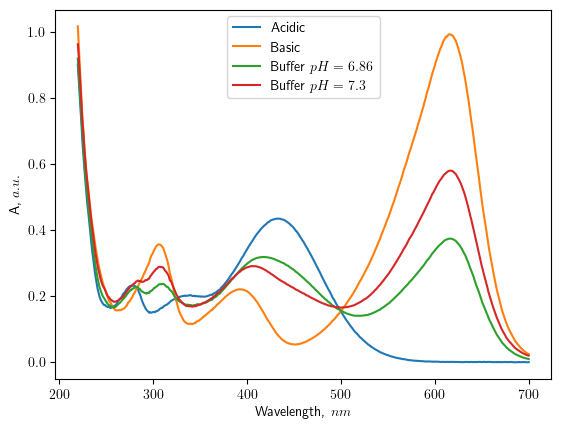

In [6]:
for i in range(len(ml4)):
    plt.plot(df[f'{ml4[i]}-wl'], df[f'{ml4[i]}-a'], label=names[i])
plt.legend()
plt.xlabel('Wavelength, $nm$')
plt.ylabel('A, $a.u.$')

## Изобестические точки

In [7]:
for a in [3, 5, 9, 10]:
    for b in [5, 9, 10]:
        if b > a:
            intersect_ind = np.argwhere(np.diff(np.sign(
                                                        interpolated[order.index(b)](df[f'{b}-wl']) - 
                interpolated[order.index(a)](df[f'{a}-wl']))))
            #intersect_ind = np.array(intersect_ind[0])
    for e in intersect_ind:
        print(df[f'{a}-wl'][e], a, b)

202    497.941833
Name: 3-wl, dtype: float64 3 10
373    327.041718
Name: 3-wl, dtype: float64 3 10
422    277.975433
Name: 3-wl, dtype: float64 3 10
435    265.075775
Name: 3-wl, dtype: float64 3 10
196    504.013458
Name: 5-wl, dtype: float64 5 10
378    322.038727
Name: 5-wl, dtype: float64 5 10
413    286.931702
Name: 5-wl, dtype: float64 5 10
450    249.952286
Name: 5-wl, dtype: float64 5 10
205    495.055115
Name: 9-wl, dtype: float64 9 10
312    388.051514
Name: 9-wl, dtype: float64 9 10
347    352.941803
Name: 9-wl, dtype: float64 9 10
348    352.007263
Name: 9-wl, dtype: float64 9 10
349    351.072571
Name: 9-wl, dtype: float64 9 10
367    332.978546
Name: 9-wl, dtype: float64 9 10
205    494.989014
Name: 10-wl, dtype: float64 10 10
312    387.966186
Name: 10-wl, dtype: float64 10 10
347    353.006103
Name: 10-wl, dtype: float64 10 10
348    352.071411
Name: 10-wl, dtype: float64 10 10
349    350.980774
Name: 10-wl, dtype: float64 10 10
367    333.039825
Name: 10-wl, dtype: fl

Получили несколько изобестических точек на длинах волн:
- $500nm$
- $327nm$
- $277nm$ — сомнительно

Возьмём первые две для начала

Text(0.5, 1.0, 'Calculating $\\epsilon_{{330}}$')

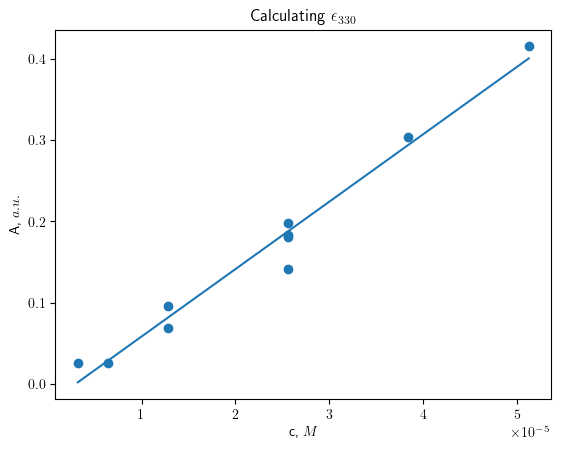

In [8]:
lam = np.array([330, 500])

A_lam0 = np.array([get_value(df[f'{i}-wl'], df[f'{i}-a'], lam[0]) for i in order])
A_lam0
c_iso = [c[i - 1] for i in order]
plt.scatter(c_iso, A_lam0)
params = linregress(c_iso, A_lam0)
c_fine = np.linspace(min(c_iso), max(c_iso), 100)
plt.plot(c_fine, f(c_fine, params[0], params[1]))
l = 1 # cm
plt.ylabel(r'A, $a.u.$')
plt.xlabel(r'c, $M$')
plt.title(r'Calculating $\epsilon_{{330}}$')

In [9]:
eps_lam0 = params[0] / l
print(f'Коэффициент молярного поглощения для изобестической точки (lambda=330nm): {eps_lam0} (Mcm)^-1')

Коэффициент молярного поглощения для изобестической точки (lambda=330nm): 8289.542223071283 (Mcm)^-1


Text(0.5, 1.0, 'Calculating $\\epsilon_{{500}}$')

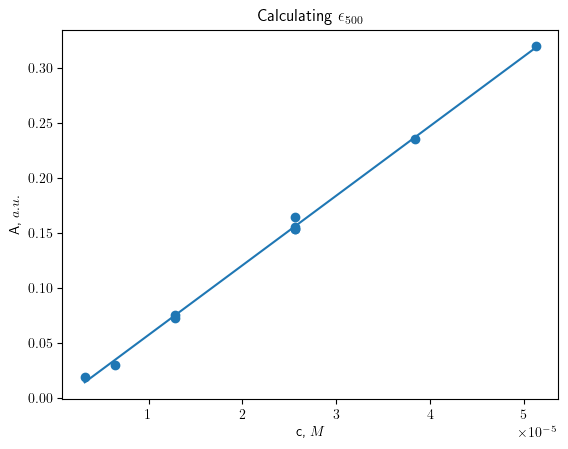

In [10]:
A_lam1 = np.array([get_value(df[f'{i}-wl'], df[f'{i}-a'], lam[1]) for i in order])
plt.scatter(c_iso, A_lam1)
params = linregress(c_iso, A_lam1)
c_fine = np.linspace(min(c_iso), max(c_iso), 100)
plt.plot(c_fine, f(c_fine, params[0], params[1]))
l = 1 # cm
plt.ylabel(r'A, $a.u.$')
plt.xlabel(r'c, $M$')
plt.title(r'Calculating $\epsilon_{{500}}$')

In [11]:
eps_lam1 = params[0] / l
print(f'Коэффициент молярного поглощения для изобестической точки (lambda=500nm): {eps_lam1} (Mcm)^-1')

Коэффициент молярного поглощения для изобестической точки (lambda=500nm): 6335.180055591565 (Mcm)^-1


## Определим оптические плотности на $\lambda_1=615nm$

$$\lg{K_a}=\lg{\frac{\alpha}{1-\alpha}}- pH + \lg{\frac{\gamma_{2-}}{\gamma_-}}$$

$$\lg{\gamma_{i-}} = - \frac{0.509\cdot Z_{i-}^2\sqrt{I}}{1 + \sqrt{I}}$$

In [17]:
A_615 = np.array([get_value(df[f'{i}-wl'], df[f'{i}-a'], 615) for i in order])
for i in range(len( A_615 )):
    print(order[i], A_615[i])

3 0.00021305331407628326
5 0.9919604910412085
9 0.3732778144395717
1 0.001912948898156933
2 0.0014257770848560107
4 0.00033745172262822994
6 0.47631862912931705
7 0.20775502348706218
8 0.1195595422109324
10 0.5784557588099838


In [23]:
find_peaks(df[f'{3}-a'], height=0.4)
print(df[f'{3}-wl'][267])

432.9755859


Поэтому выберем другую длину волны равную 433 (макисмум поглощения протониорованной формы) 

In [25]:
A_433 = np.array([get_value(df[f'{i}-wl'], df[f'{i}-a'], 433) for i in order])
for i in range(len( A_433 )):
    print(order[i], A_433[i])

3 0.4341434522099323
5 0.08173459685352183
9 0.30688853860882753
1 0.9074116601870302
2 0.6663326835938203
4 0.2121723908805472
6 0.037683877024247116
7 0.014164173091850763
8 0.011546795278351443
10 0.25224353779536157


Судя по всему, выбор длины волны, где анион поглощает хужу идея плохая, поэтому возьмём $\lambda=300nm$

In [26]:
A_300 = np.array([get_value(df[f'{i}-wl'], df[f'{i}-a'], 300) for i in order])
for i in range(len( A_300 )):
    print(order[i], A_300[i])

3 0.15119032598342724
5 0.33005763304669455
9 0.2195762529286821
1 0.31650134587223294
2 0.2306371179580371
4 0.07392731352450463
6 0.16378194235479307
7 0.06798470362616967
8 0.05398798522784673
10 0.26973501480824824


Так как раствор **буферный**, то только по $pH$ невозможно определить концентрацию, можно только доли форм.

$$K_{a1}=7.6\cdot 10^{-3}$$
$$K_{a2}=5.9\cdot 10^{-8}$$
$$K_{a1}=5.9\cdot 10^{-13}$$
$$\Phi_{PO_4} = 1 + \frac{[H^+]}{K_{a3}} + \frac{[H^+]^2}{K_{a3}K_{a2}} + \frac{[H^+]^3}{K_{a3}K_{a2}K_{a1}} $$
Для $pH=7.3$
$$[H^+]=5.01\cdot 10^{-8}$$
$$\Phi_{PO_4} = 1 + 8.5 \cdot 10^{4} + 7.2\cdot 10^{4} + 4.8\cdot 10^{-1} = 1.6 \cdot 10^{5}$$
$$\alpha_{H_2PO_4^-} = 0.55$$
$$\alpha_{HPO_4^{2-}} = 0.45$$
Поэтому в расчётах возьмём её за $0.01M$ тоже. 

## Расчёт доли форм

$$\frac{\alpha}{1-\alpha} = \frac{D(615)}{D_{HA^-}(615)}$$